In [1]:
import pandas as pd
import datetime as dt
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

pmi = pd.read_excel('OG PMI.xlsx', header=0, parse_dates=[0])
pmi = pmi.loc[(pmi['Date']>'2016-12-01') & (pmi['Date']<'2021-04-01')]
pmi = pmi.reset_index()

p = {'Date': 'first', 'PMI': 'sum'}
pmi = pmi.groupby(pmi.index // 3).agg(p)

pmi

,Date,PMI
0,2017-01-01,170.9
1,2017-04-01,167.5
2,2017-07-01,175.9
3,2017-10-01,176.6
4,2018-01-01,179.1
5,2018-04-01,176.6
6,2018-07-01,178.7
7,2018-10-01,170.6
8,2019-01-01,166.1
9,2019-04-01,156.6


In [2]:
import datetime as dt

bookings = pd.read_csv('Bookings.csv', parse_dates=[0])
bookings = bookings.reindex(index=bookings.index[::-1])
bookings = bookings.loc[(bookings['Booking Date (BBS)']>='2017-01-01') & (bookings['Booking Date (BBS)']<'2021-04-01')]
bookings['Booking Date (BBS)'] = [date.replace(day=1) for date in bookings['Booking Date (BBS)']]
bookings = bookings.resample('MS', on='Booking Date (BBS)').sum()


bookings.reset_index(level=0, inplace=True)
b = {'Booking Date (BBS)':'first', 'Booking Qty (BBS)':'sum','Calculated Total Sale':'sum','Calculated GP$':'sum'}
quarter_bookings = bookings.groupby(bookings.index // 3).agg(b)
quarter_bookings.set_index('Booking Date (BBS)', inplace=True)

quarter_bookings

,Booking Qty (BBS),Calculated Total Sale,Calculated GP$
Booking Date (BBS),,,
2017-01-01,201.0,31194716.88,10669832.36
2017-04-01,201.0,32625385.60,7352427.03
2017-07-01,238.0,38598142.72,8932951.23
2017-10-01,305.0,45785459.10,12087574.75
2018-01-01,272.0,44680065.28,9709202.32
2018-04-01,315.0,52353867.13,11933791.43
2018-07-01,344.0,62312755.07,14359572.23
2018-10-01,305.0,66879805.88,17529132.74
2019-01-01,260.0,51174896.48,9454020.99


In [3]:
quarter_bookings['Total PMI'] = [row for row in pmi['PMI']]
quarter_bookings['Bookings Change'] = [quarter_bookings['Booking Qty (BBS)'][n]-quarter_bookings['Booking Qty (BBS)'][n-1] 
                                       if n>0 else 0 for n in range(len(quarter_bookings))]
quarter_bookings['Total PMI Change'] = [quarter_bookings['Total PMI'][n]-quarter_bookings['Total PMI'][n-1] if n>0 
                                           else 0 for n in range(len(quarter_bookings))]
quarter_bookings['Bookings Trend'] = quarter_bookings['Bookings Change']/[abs(value)
                                                                            for value in 
                                                                            (quarter_bookings['Bookings Change'])]
quarter_bookings['Calculated Total Sale Change'] = [quarter_bookings['Calculated Total Sale'][n]-quarter_bookings['Calculated Total Sale'][n-1] if n>0 else 0 for n in range(len(quarter_bookings))]
quarter_bookings['Calculated Total Sale Trend'] = quarter_bookings['Calculated Total Sale Change']/[abs(value)
                                                                                      for value in
                                                                                      (quarter_bookings['Calculated Total Sale Change'])]
quarter_bookings['Total PMI Trend'] = quarter_bookings['Total PMI Change']/[abs(value)
                                                                                      for value in
                                                                                      (quarter_bookings['Total PMI Change'])]
quarter_bookings = quarter_bookings.fillna(0)
quarter_bookings.head(10)

,Booking Qty (BBS),Calculated Total Sale,Calculated GP$,Total PMI,Bookings Change,Total PMI Change,Bookings Trend,Calculated Total Sale Change,Calculated Total Sale Trend,Total PMI Trend
Booking Date (BBS),,,,,,,,,,
2017-01-01,201.0,31194716.88,10669832.36,170.9,0.0,0.0,0.0,0.00,0.0,0.0
2017-04-01,201.0,32625385.60,7352427.03,167.5,0.0,-3.4,0.0,1430668.72,1.0,-1.0
2017-07-01,238.0,38598142.72,8932951.23,175.9,37.0,8.4,1.0,5972757.12,1.0,1.0
2017-10-01,305.0,45785459.10,12087574.75,176.6,67.0,0.7,1.0,7187316.38,1.0,1.0
2018-01-01,272.0,44680065.28,9709202.32,179.1,-33.0,2.5,-1.0,-1105393.82,-1.0,1.0
2018-04-01,315.0,52353867.13,11933791.43,176.6,43.0,-2.5,1.0,7673801.85,1.0,-1.0
2018-07-01,344.0,62312755.07,14359572.23,178.7,29.0,2.1,1.0,9958887.94,1.0,1.0
2018-10-01,305.0,66879805.88,17529132.74,170.6,-39.0,-8.1,-1.0,4567050.81,1.0,-1.0
2019-01-01,260.0,51174896.48,9454020.99,166.1,-45.0,-4.5,-1.0,-15704909.40,-1.0,-1.0


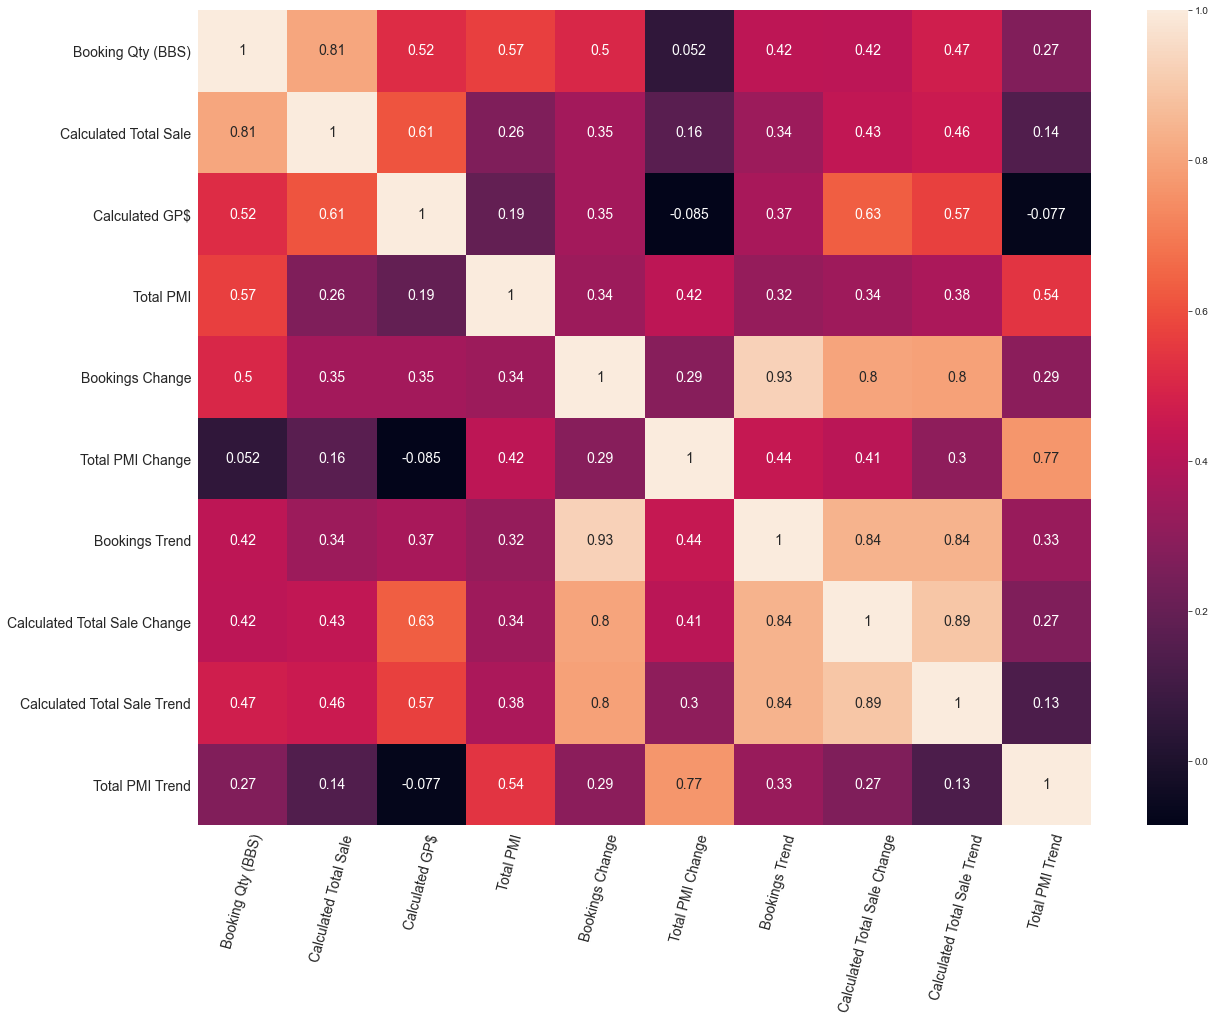

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
sns.set_style("whitegrid")

fig,ax = plt.subplots(figsize=(20,15))
sns.heatmap(quarter_bookings.corr(), annot=True, annot_kws={"fontsize":14})
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14, labelrotation=75)

In [5]:
count=0
for n in range(len(quarter_bookings)):
    if quarter_bookings['Bookings Trend'][n]==quarter_bookings['Calculated Total Sale Trend'][n]:
        count=count+1
print('Number of times Bookings and Total Sales change in the same direction: ' + str(count) + ' out of 18 times')

Number of times Bookings and Total Sales change in the same direction: 15 out of 18 times


In [6]:
import pmdarima as pm

pmi = pd.read_excel('OG PMI.xlsx', header=0, parse_dates=[0])
pmi = pmi.loc[pmi['Date']<'2021-04-01']
pmi = pmi.reset_index()

p = {'Date': 'first', 'PMI': 'sum'}
pmi = pmi.groupby(pmi.index // 3).agg(p)
pmi = pmi.set_index('Date')

results = pm.auto_arima(pmi['PMI'], seasonal=True, m=4, error_action='ignore', suppress_warnings=True)
results

ARIMA(order=(2, 0, 2), scoring_args={}, seasonal_order=(1, 0, 1, 4),
      suppress_warnings=True)

C:\Users\sgau\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\sgau\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\sgau\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\sgau\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\sgau\Anaconda3\lib\site-packages\statsmodels\base\model.py:5

Mean absolute error: 9.229448403789034
Number of times observed PMI lay outside 95% confidence intervals: 12


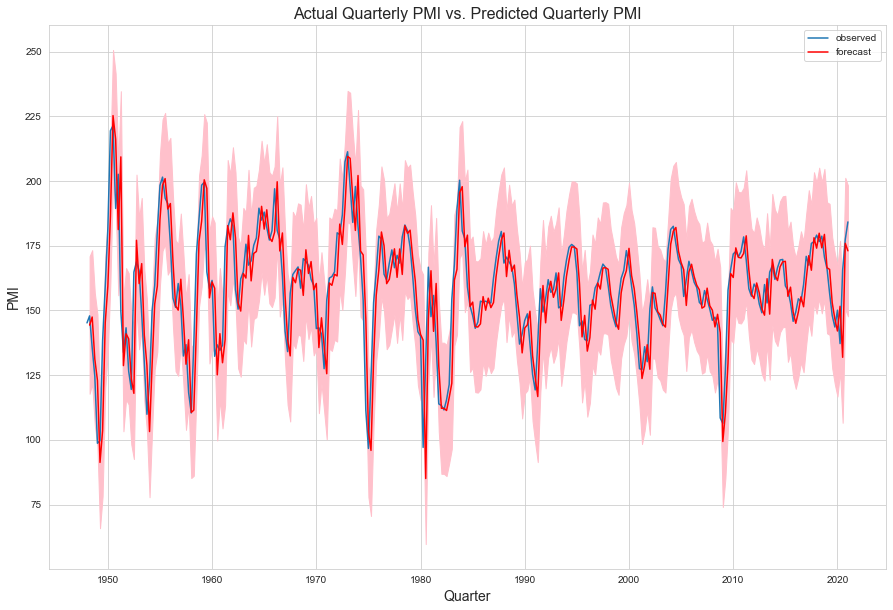

In [7]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

results = SARIMAX(pmi['PMI'], order=(2,0,2), seasonal_order=(1,0,1,4)).fit()

fig, ax = plt.subplots(figsize=(15,10))
one_step_forecast = results.get_prediction(start=-len(pmi))
mean_forecast = one_step_forecast.predicted_mean
plt.plot(pmi.index, pmi['PMI'], label='observed')
plt.plot(mean_forecast.index[1:], mean_forecast['1948-04-01':], color='r', label='forecast')
confidence_intervals = one_step_forecast.conf_int()
lower_limits = confidence_intervals.loc['1948-04-01':,'lower PMI']
upper_limits = confidence_intervals.loc['1948-04-01':,'upper PMI']
plt.fill_between(lower_limits.index, lower_limits, upper_limits, color='pink')
plt.legend()
plt.title('Actual Quarterly PMI vs. Predicted Quarterly PMI', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('PMI', fontsize=14)

print('Mean absolute error: ' + str(np.mean(abs(results.resid[1:]))))

outside = 0
for n in range(len(pmi)):
    if (pmi['PMI'][n] > confidence_intervals['upper PMI'][n]) or (mean_forecast[n] < confidence_intervals['lower PMI'][n]):
        outside += 1
    else:
        outside = outside
print('Number of times observed PMI lay outside 95% confidence intervals: ' + str(outside))

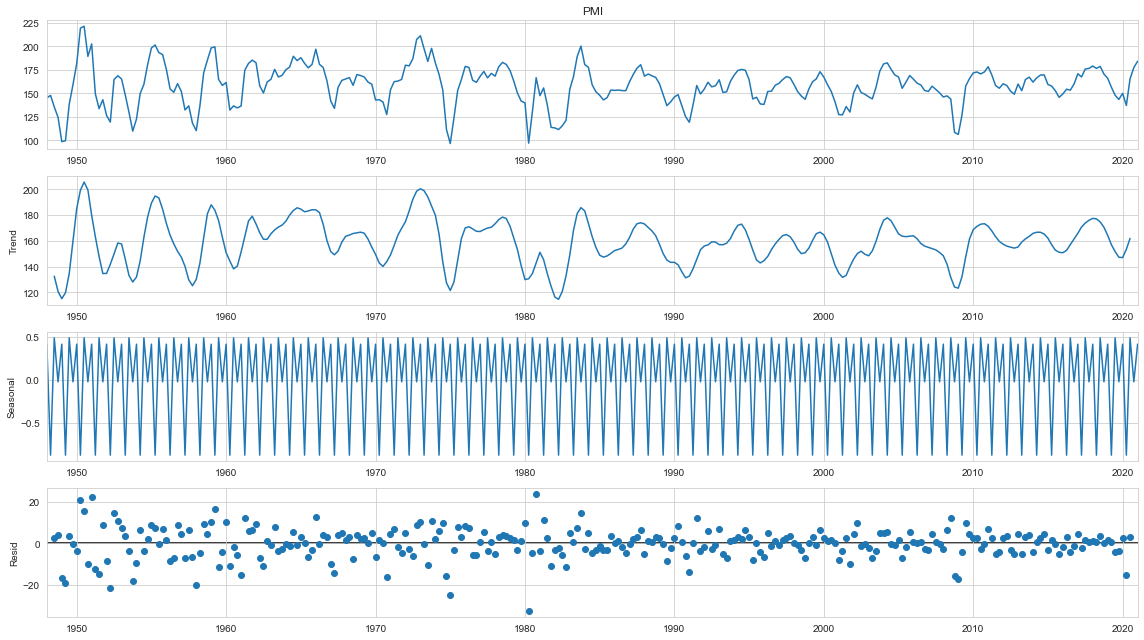

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

plt.rcParams["figure.figsize"] = [16,9]
fig = seasonal_decompose(pmi['PMI'], period=4).plot()

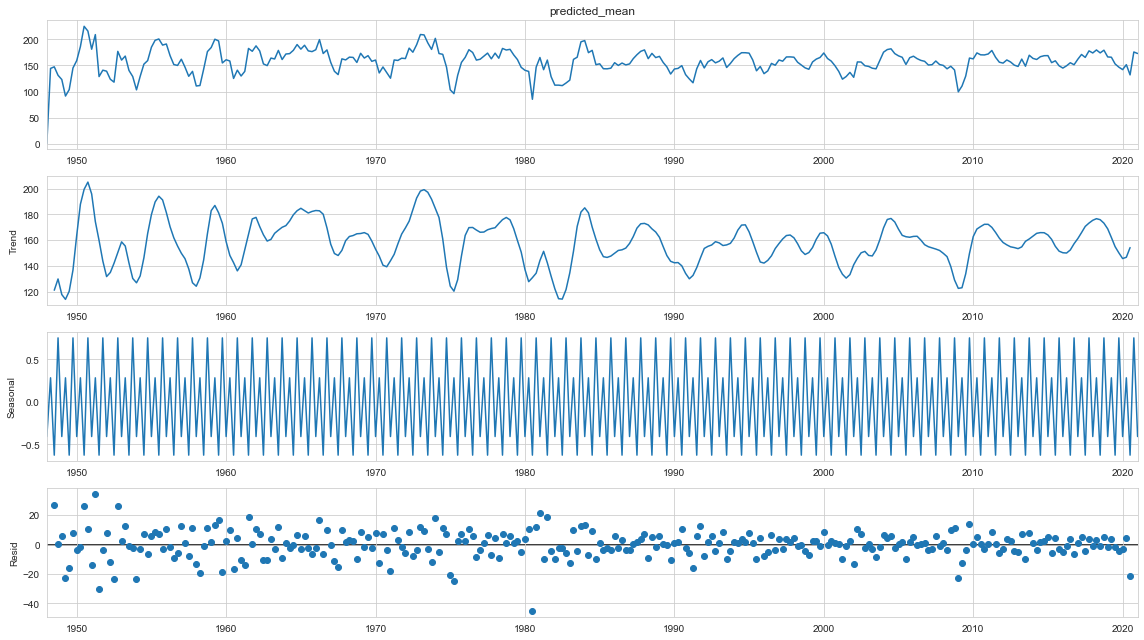

In [9]:
plt.rcParams["figure.figsize"] = [16,9]
fig = seasonal_decompose(mean_forecast, period=4).plot()

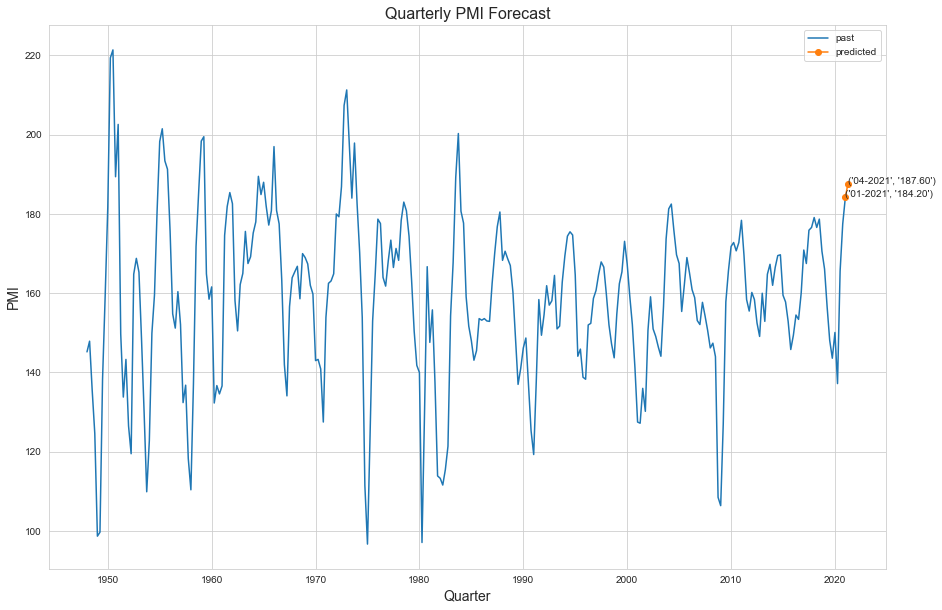

In [10]:
fig, ax = plt.subplots(figsize=(15,10))

forecast_object = results.get_forecast(steps=1)
mean = pd.concat([pmi['PMI'].tail(1), forecast_object.predicted_mean])
last_conf_int = pd.DataFrame(index=['2021-01-01'], 
             data={'lower Booking Qty (BBS)':pmi['PMI'].iloc[-1],
                  'upper Booking Qty (BBS)':pmi['PMI'].iloc[-1]})
conf_int = pd.concat([last_conf_int, forecast_object.conf_int()])
dates = mean.index

plt.plot(pmi.index, pmi['PMI'], label='past')
plt.plot(dates, mean, label='predicted', marker='o')
plt.fill_between(dates, conf_int['lower PMI'], conf_int['upper PMI'], alpha=0.2)

plt.title('Quarterly PMI Forecast', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('PMI', fontsize=14)

for i,j in mean.items():
    ax.annotate((i.strftime('%m-%Y'),"{:.2f}".format(j)), xy=(i, j))

plt.legend()
plt.show()

In [30]:
bookings = pd.read_csv('Bookings.csv', parse_dates=[0])
bookings = bookings.reindex(index=bookings.index[::-1])
bookings = bookings.loc[(bookings['Booking Date (BBS)']>='2015-10-01') & (bookings['Booking Date (BBS)']<'2021-07-01')]
bookings['Booking Date (BBS)'] = [date.replace(day=1) for date in bookings['Booking Date (BBS)']]
bookings = bookings.resample('MS', on='Booking Date (BBS)').sum()

bookings.reset_index(level=0, inplace=True)
b = {'Booking Date (BBS)':'first', 'Booking Qty (BBS)':'sum','Calculated Total Sale':'sum','Calculated GP$':'sum'}
quarter_bookings = bookings.groupby(bookings.index // 3).agg(b)
quarter_bookings.set_index('Booking Date (BBS)', inplace=True)

results = pm.auto_arima(quarter_bookings['Booking Qty (BBS)'], seasonal=True, m=4, error_action='ignore', suppress_warnings=True)
results

ARIMA(order=(1, 0, 1), scoring_args={}, seasonal_order=(0, 0, 0, 4),
      suppress_warnings=True)

C:\Users\sgau\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\sgau\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\sgau\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Mean absolute error: 41.12732333581904
Number of times observed PMI lay outside 95% confidence intervals: 0 out of 23 times


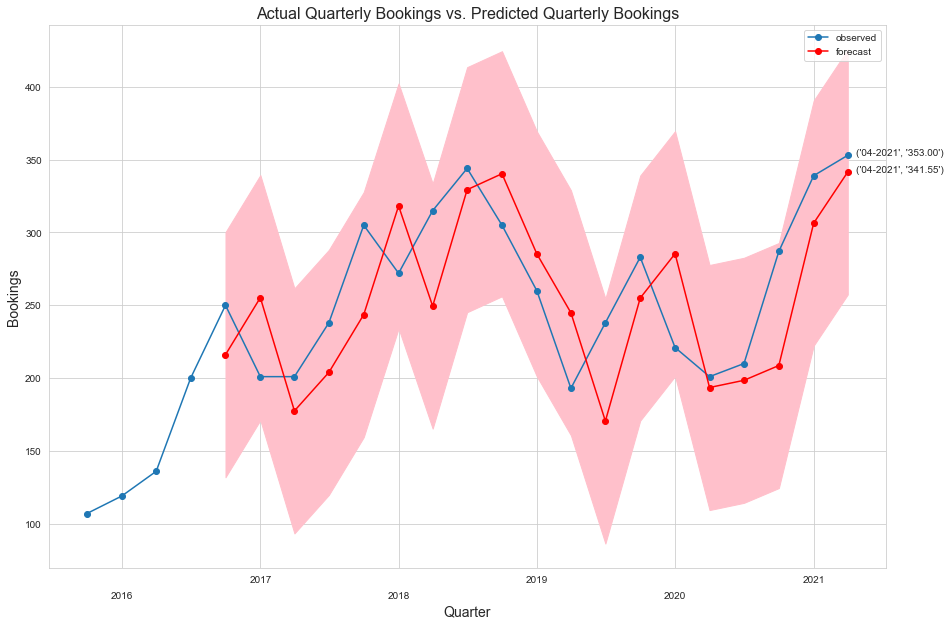

In [31]:
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

results = SARIMAX(quarter_bookings['Booking Qty (BBS)'], order=(1,0,1), seasonal_order=(0,0,0,4)).fit()

fig, ax = plt.subplots(figsize=(15,10))
one_step_forecast = results.get_prediction(start=-len(quarter_bookings))
mean_forecast = one_step_forecast.predicted_mean
plt.plot(quarter_bookings.index, quarter_bookings['Booking Qty (BBS)'], label='observed', marker='o')
plt.plot(mean_forecast[4:].index, mean_forecast.iloc[4:], color='r', label='forecast', marker='o')
confidence_intervals = one_step_forecast.conf_int()
lower_limits = confidence_intervals.loc['2016-10-01':,'lower Booking Qty (BBS)']
upper_limits = confidence_intervals.loc['2016-10-01':,'upper Booking Qty (BBS)']
plt.fill_between(lower_limits.index, lower_limits, upper_limits, color='pink')
plt.legend()
plt.title('Actual Quarterly Bookings vs. Predicted Quarterly Bookings', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Bookings', fontsize=14)
for tick in ax.xaxis.get_major_ticks()[1::2]:
    tick.set_pad(20)
    
for var in (quarter_bookings['Booking Qty (BBS)'], mean_forecast):
    plt.annotate((quarter_bookings['Booking Qty (BBS)'].index[-1].strftime('%m-%Y'),'%0.2f' % var[-1]), xy=(1, var[-1]), xytext=(-30, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
    
print('Mean absolute error: ' + str(np.mean(abs(results.resid))))

outside = 0
for n in range(len(quarter_bookings)):
    if (quarter_bookings['Booking Qty (BBS)'][n] > confidence_intervals['upper Booking Qty (BBS)'][n]) or (mean_forecast[n] < confidence_intervals['lower Booking Qty (BBS)'][n]):
        outside += 1
    else:
        outside = outside
print('Number of times observed PMI lay outside 95% confidence intervals: ' + str(outside) + ' out of ' + str(len(quarter_bookings)) + ' times')

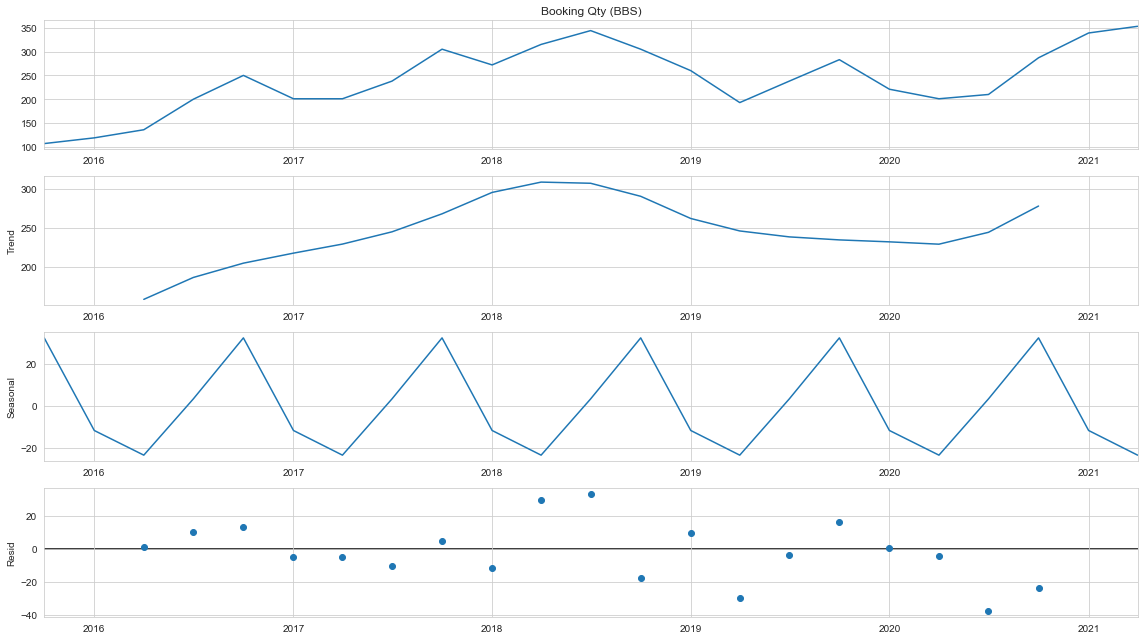

In [32]:
plt.rcParams["figure.figsize"] = [16,9]
fig = seasonal_decompose(quarter_bookings['Booking Qty (BBS)'], period=4).plot()

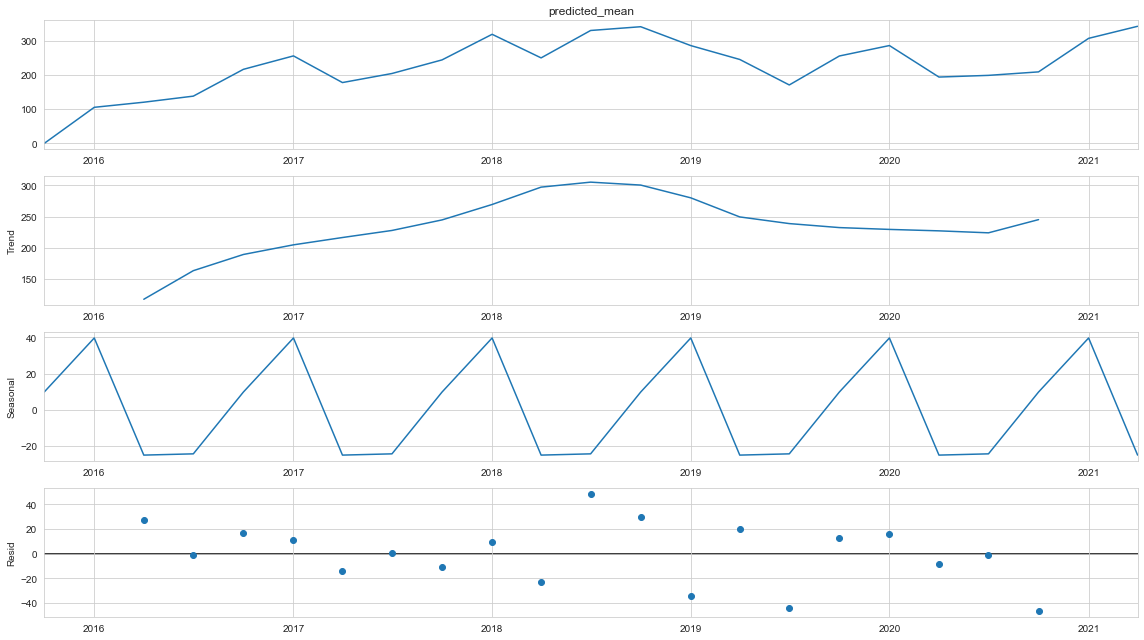

In [33]:
plt.rcParams["figure.figsize"] = [16,9]
fig = seasonal_decompose(mean_forecast, period=4).plot()

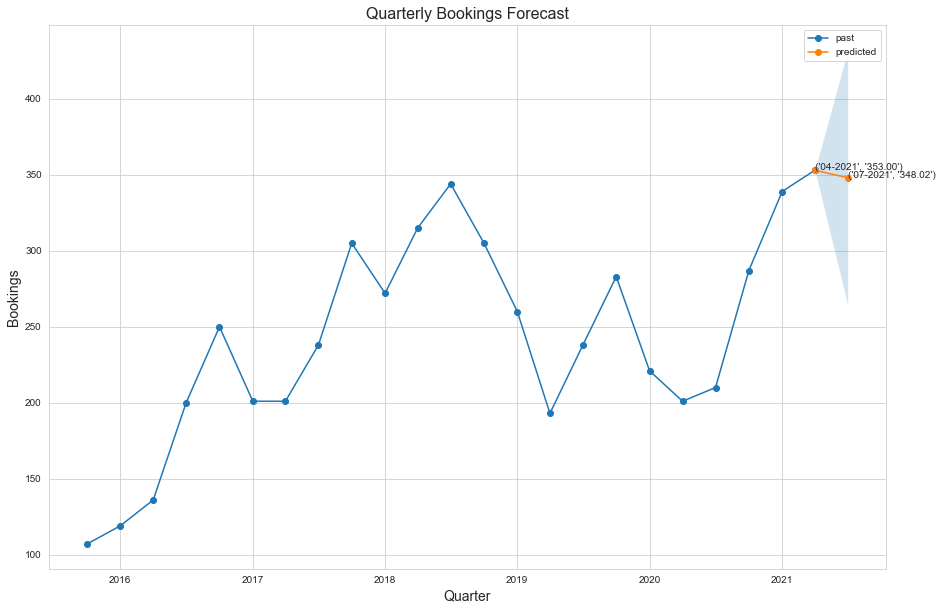

In [34]:
fig, ax = plt.subplots(figsize=(15,10))

forecast_object = results.get_forecast(steps=1)
mean = pd.concat([quarter_bookings['Booking Qty (BBS)'].tail(1), forecast_object.predicted_mean])
last_conf_int = pd.DataFrame(index=['2021-04-01'], 
             data={'lower Booking Qty (BBS)':quarter_bookings['Booking Qty (BBS)'][-1],
                  'upper Booking Qty (BBS)': quarter_bookings['Booking Qty (BBS)'][-1]})
conf_int = pd.concat([last_conf_int, forecast_object.conf_int()])
dates = mean.index

plt.plot(quarter_bookings.index, quarter_bookings['Booking Qty (BBS)'], label='past', marker='o')
plt.plot(dates, mean, label='predicted', marker='o')
plt.fill_between(dates, conf_int['lower Booking Qty (BBS)'], conf_int['upper Booking Qty (BBS)'], alpha=0.2)

plt.title('Quarterly Bookings Forecast', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Bookings', fontsize=14)

for i,j in mean.items():
    ax.annotate((i.strftime('%m-%Y'),"{:.2f}".format(j)), xy=(i, j))

plt.legend()
plt.show()

In [16]:
conf_int

,lower Booking Qty (BBS),upper Booking Qty (BBS)
2021-04-01,353.000000,353.000000
2021-07-01 00:00:00,263.866907,432.168693
2021-10-01 00:00:00,200.250094,478.284424
2022-01-01 00:00:00,154.776043,506.697442


In [64]:
gdpmi = pd.read_csv('GDP.csv', parse_dates=[0])
gdpmi = gdpmi.set_index('date')
gdpmi = gdpmi.loc['1948-01-01':]

gdpmi['PMI'] = [row for row in pmi.loc[:'2017-04-01']['PMI']]

gdpmi

,Nominal GDP Growth,Real GDP Growth,PMI
date,,,
1948-01-01,10.5,6.7,145.2
1948-04-01,10.0,2.3,147.9
1948-07-01,1.7,0.4,135.6
1948-10-01,-7.3,-5.4,124.6
1949-01-01,-5.2,-1.3,98.7
...,...,...,...
2016-04-01,4.2,2.8,154.5
2016-07-01,3.8,1.8,153.4
2016-10-01,3.3,1.2,160.0


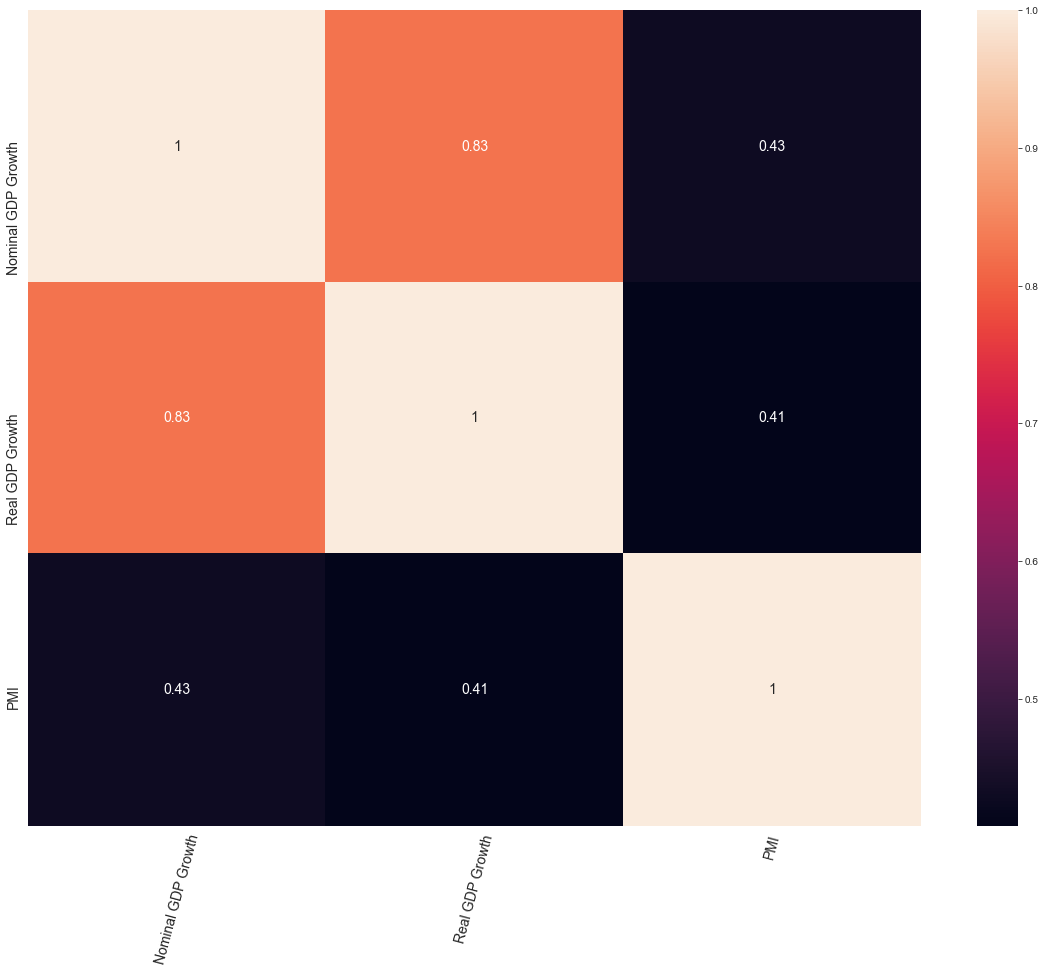

In [66]:
fig,ax = plt.subplots(figsize=(20,15))
sns.heatmap(gdpmi.corr(), annot=True, annot_kws={"fontsize":14})
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14, labelrotation=75)

In [79]:
gdpmi['PMI'].min()-150, gdpmi['PMI'].max()-150

(-53.30000000000001, 71.4)

Number of times PMI and GDP growth change in the same direction: 196 out of 278 times


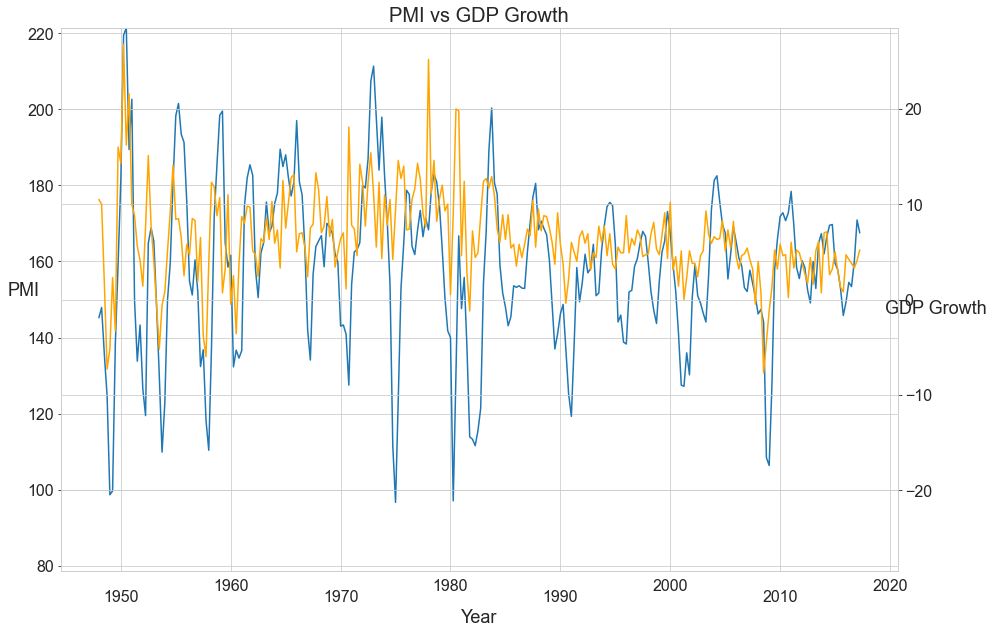

In [81]:
fig,ax = plt.subplots(figsize=(15,10))
ax.plot(gdpmi.index, gdpmi['PMI'])
ax2 = ax.twinx()
ax2.plot(gdpmi.index, gdpmi['Nominal GDP Growth'], color='orange')
plt.title('PMI vs GDP Growth', fontsize=20)
ax.set_ylabel('PMI', fontsize=18).set_rotation(0)
ax2.set_ylabel('GDP Growth', fontsize=18).set_rotation(0)
ax.set_xlabel('Year', fontsize=18)
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16)
ax2.tick_params(axis='y', labelsize=16)
for tick in ax.xaxis.get_major_ticks()[1::2]:
    tick.set_pad(15)
yabs_max = abs(max(ax2.get_ylim(), key=abs))
ax.set_ylim(ymin=150-71.4, ymax=150+71.4)
ax2.set_ylim(ymin=-yabs_max, ymax=yabs_max)
    
count=0
for n in range(len(gdpmi)):
    if (gdpmi['PMI'][n] > 150) & (gdpmi['PMI'][n] > 0):
        count=count+1
    elif (gdpmi['PMI'][n] < 150) & (gdpmi['PMI'][n] < 0):
        count=count+1
    elif (gdpmi['PMI'][n] == 150) & (gdpmi['PMI'][n] == 0):
        count=count+1
    else:
        count=count
print('Number of times PMI and GDP growth change in the same direction: ' + str(count) + ' out of ' + str(len(gdpmi)) + ' times')

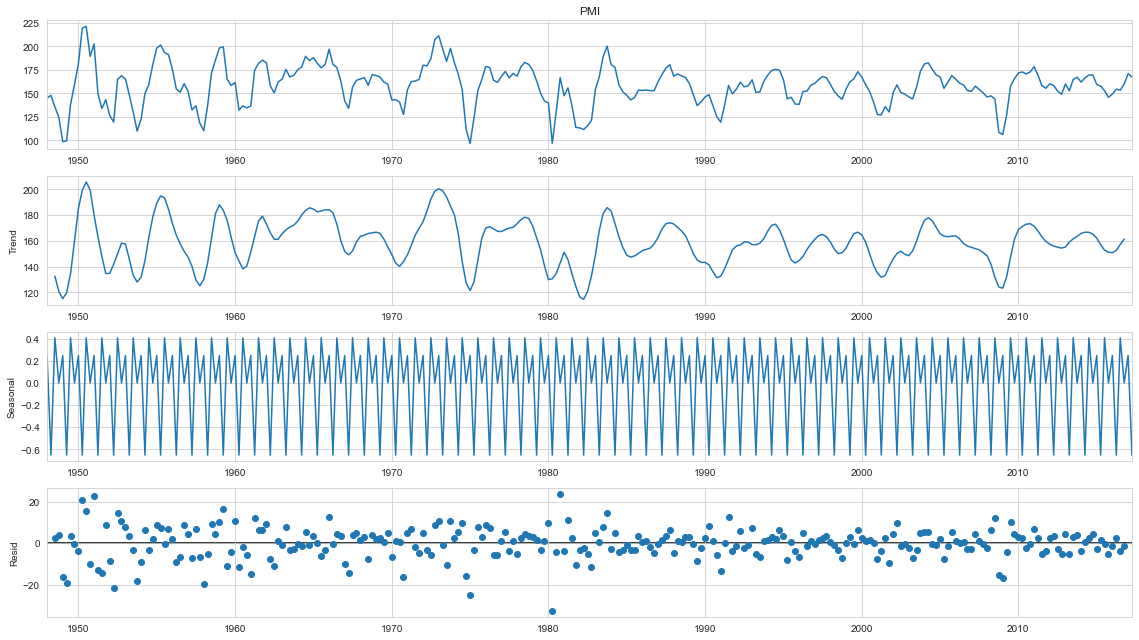

In [82]:
plt.rcParams["figure.figsize"] = [16,9]
fig = seasonal_decompose(gdpmi['PMI'], period=4).plot()

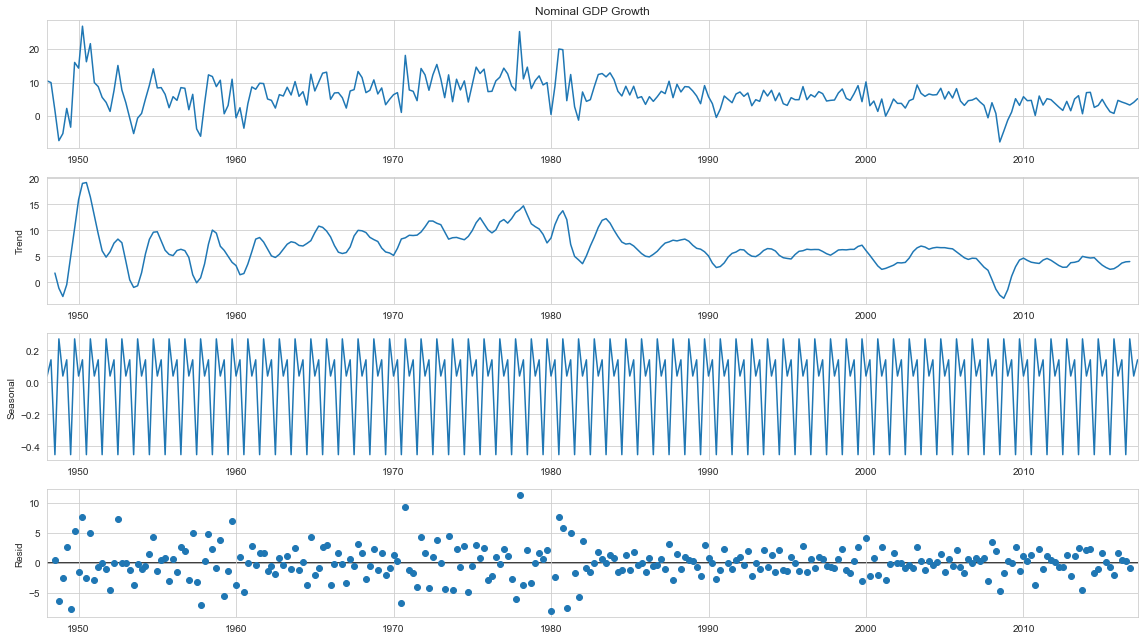

In [83]:
plt.rcParams["figure.figsize"] = [16,9]
fig = seasonal_decompose(gdpmi['Nominal GDP Growth'], period=4).plot()

In [84]:
results = pm.auto_arima(gdpmi['Nominal GDP Growth'], seasonal=True, m=4, error_action='ignore', suppress_warnings=True)
results

ARIMA(order=(2, 1, 2), scoring_args={}, seasonal_order=(2, 0, 2, 4),
      suppress_warnings=True, with_intercept=False)

C:\Users\sgau\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\sgau\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\sgau\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Mean absolute error: 2.8058936686387206
Number of times observed Nominal GDP Growth lay outside 95% confidence intervals: 9 out of 278 times


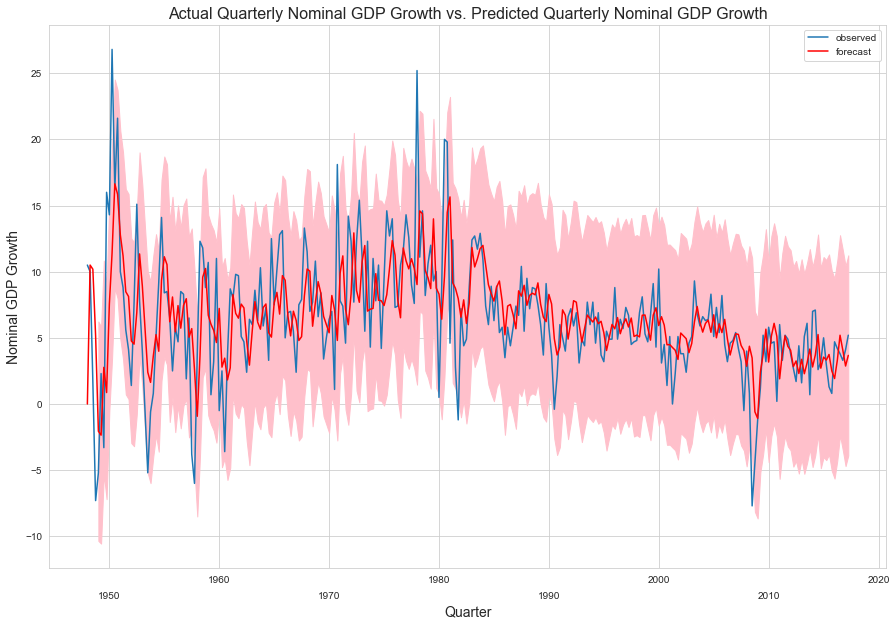

In [96]:
results = SARIMAX(gdpmi['Nominal GDP Growth'], order=(2,1,2), seasonal_order=(2,0,2,4)).fit()

fig, ax = plt.subplots(figsize=(15,10))
one_step_forecast = results.get_prediction(start=-len(gdpmi))
mean_forecast = one_step_forecast.predicted_mean
plt.plot(gdpmi.index, gdpmi['Nominal GDP Growth'], label='observed')
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')
confidence_intervals = one_step_forecast.conf_int()
lower_limits = confidence_intervals.loc['1949-01-01':,'lower Nominal GDP Growth']
upper_limits = confidence_intervals.loc['1949-01-01':,'upper Nominal GDP Growth']
plt.fill_between(lower_limits.index, lower_limits, upper_limits, color='pink')
plt.legend()
plt.title('Actual Quarterly Nominal GDP Growth vs. Predicted Quarterly Nominal GDP Growth', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Nominal GDP Growth', fontsize=14)
for tick in ax.xaxis.get_major_ticks()[1::2]:
    tick.set_pad(20)

outside = 0
for n in range(len(gdpmi)):
    if (gdpmi['Nominal GDP Growth'][n] > confidence_intervals['upper Nominal GDP Growth'][n]) or (mean_forecast[n] < confidence_intervals['lower Nominal GDP Growth'][n]):
        outside += 1
    else:
        outside = outside
    
print('Mean absolute error: ' + str(np.mean(abs(results.resid[5:]))))
print('Number of times observed Nominal GDP Growth lay outside 95% confidence intervals: ' + str(outside) + ' out of ' + str(len(gdpmi)) + ' times')

In [85]:
results = pm.auto_arima(gdpmi['Real GDP Growth'], seasonal=True, m=4, error_action='ignore', suppress_warnings=True)
results

ARIMA(order=(3, 1, 1), scoring_args={}, seasonal_order=(0, 0, 0, 4),
      suppress_warnings=True, with_intercept=False)

C:\Users\sgau\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
C:\Users\sgau\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'


Mean absolute error: 2.635004503092291
Number of times observed Real GDP Growth lay outside 95% confidence intervals: 6 out of 278 times


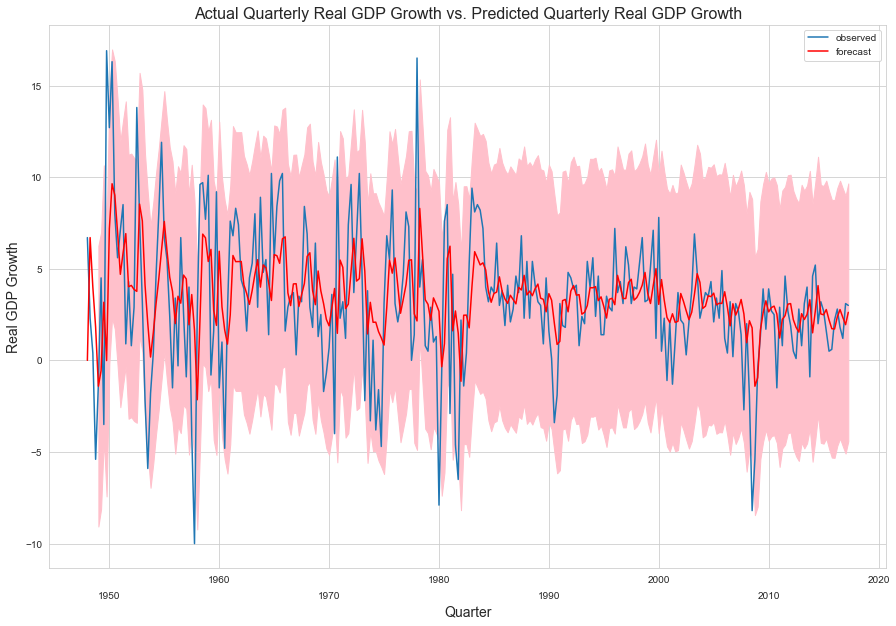

In [98]:
results = SARIMAX(gdpmi['Real GDP Growth'], order=(3,1,1), seasonal_order=(0,0,0,4)).fit()

fig, ax = plt.subplots(figsize=(15,10))
one_step_forecast = results.get_prediction(start=-len(gdpmi))
mean_forecast = one_step_forecast.predicted_mean
plt.plot(gdpmi.index, gdpmi['Real GDP Growth'], label='observed')
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')
confidence_intervals = one_step_forecast.conf_int()
lower_limits = confidence_intervals.loc['1949-01-01':,'lower Real GDP Growth']
upper_limits = confidence_intervals.loc['1949-01-01':,'upper Real GDP Growth']
plt.fill_between(lower_limits.index, lower_limits, upper_limits, color='pink')
plt.legend()
plt.title('Actual Quarterly Real GDP Growth vs. Predicted Quarterly Real GDP Growth', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Real GDP Growth', fontsize=14)
for tick in ax.xaxis.get_major_ticks()[1::2]:
    tick.set_pad(20)

outside = 0
for n in range(len(gdpmi)):
    if (gdpmi['Real GDP Growth'][n] > confidence_intervals['upper Real GDP Growth'][n]) or (mean_forecast[n] < confidence_intervals['lower Real GDP Growth'][n]):
        outside += 1
    else:
        outside = outside
    
print('Mean absolute error: ' + str(np.mean(abs(results.resid[5:]))))
print('Number of times observed Real GDP Growth lay outside 95% confidence intervals: ' + str(outside) + ' out of ' + str(len(gdpmi)) + ' times')